### Frame the problem and look at bigger picture
* Define objective in business term
    - I want to build housing price model using census data of California. We have population, median income, median house price for each block group in California. Block group is smallest geographical region(600-3000 people) for which US publish census data. We need to predict median house price in any district given other information.
* How will solution be used?
* What are current solutions? workarounds?
    - Currently If for some block median housing price is not available, expert manually find using complex rules. It is expensive and some time off with real price by more than 10%.
* How to frame the problem (supervised/unsupervised, online/offline) (classification/regression)
    - Here we have labeled training data for median price, so supervised, particularly regression. We have multiple featured to take care of. So, multivariate regression. Batch learning as there is no continuous flow of data and data can fit in memory. If data van not fit we can use Map Reduce technique.
* How performance should measured.
    - Root mean square error. Counts how much error in prediction we made. With higher weight for larger error.
    $$ RMSE(X, h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^i) - y^i)^2}$$
    - Mean Absolute Error (Average Absolute Deviation) is useful when there is an outliers
    $$MAE = \frac{1}{m}\sum_{i=1}^{m}\mid h(x^i) - y^i\mid$$
    - RMSE and MAE both are useful to measure distance between 2 vectors. Vector of prediction and target value.
* What is minimum performance needed?
* What are comparable problems? Can we re use past experience or tool?
* Human expertise available?
* How would you solve problem manually?
* List out assumption.
* Verify assumption.

### Get data
* List data you need and how much you need
* Find and document where you can get data
* Check how much space it takes
* Check legal obligation
* Create workspace
* Get the data
* Convert the data to needed format
* Ensure sensitive info is secured
* Check size and type of data (time series, sample, geographical)
* Sample test set, put it aside and never look into it.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def load_housing_data(path):
    return pd.read_csv(path)

In [5]:
housing = load_housing_data("data/housing/housing.csv")

### Explore Data
* Create copy of data for exploration (Sample it if too large)
* Study attributes (Type-categorical, numerical, bounded,unbounded, text, structured)
    * % of missing values
    * Noisiness (Stochastic, outlier, rounding error)
    * Type of distribution (Guassian, uniform, logarithmic)
* Identify target attribute for supervised learning
* Visualize data
* Study correlation between attributes
* Study how to solve problem manually
* Identify needed transformation
* Identify extra data needed
* Document what you learned.

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* Each row shows one district

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


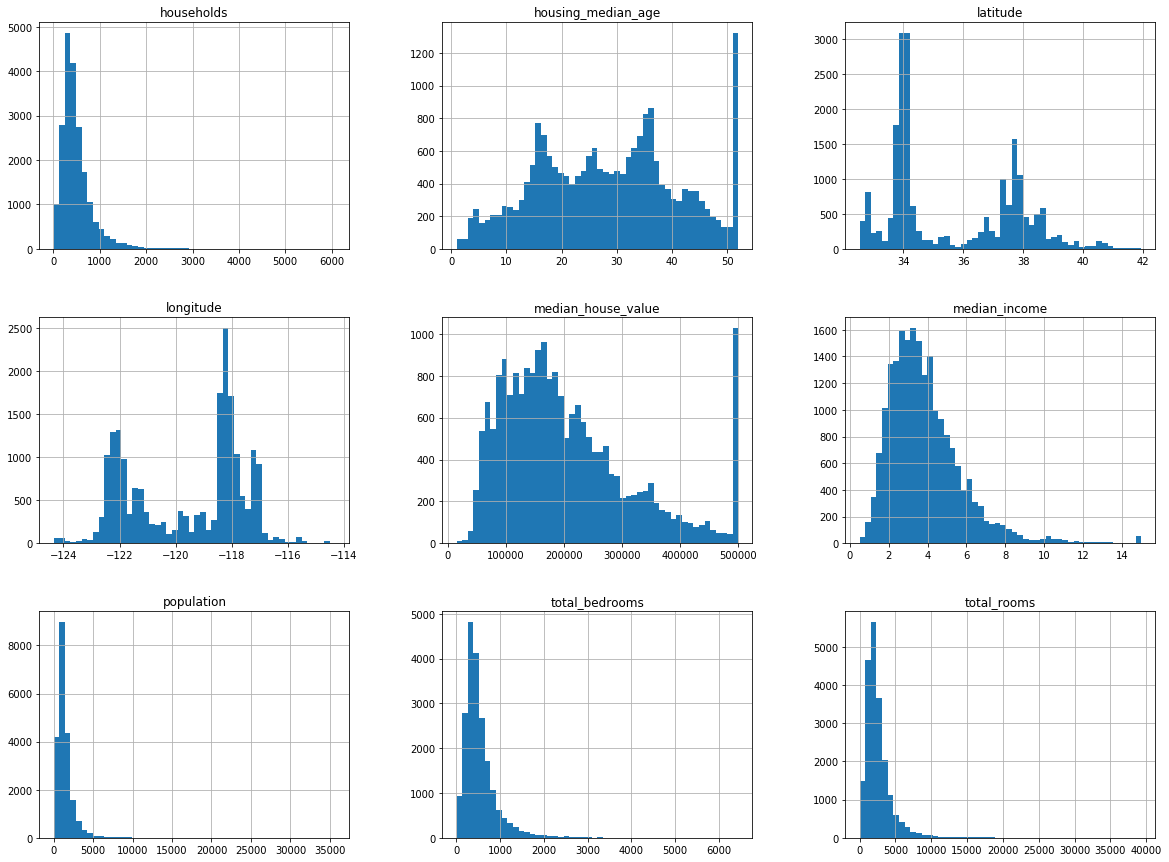

In [12]:
housing.hist(bins=50, figsize=(20,15));

#### Create Test set

* **Data snooping bias**: Looking at test set, may give some pattern in brain, which leads to choosing specific model and overfitting.

In [26]:
import numpy as np

In [27]:
def split_train_test(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indicies =  shuffle_indices[test_set_size:]
    return data.iloc[train_indicies], data.iloc[test_indices]

In [28]:
train_set, test_set = split_train_test(housing,0.2)

In [29]:
len(train_set)

16512

In [30]:
len(test_set)

4128

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

* Here we can also pass multiple dataset with same number of rows, each dataset will be split by same index. Useful when 2 different data frame for attributes and label.

#### Stratified Sampling
* Let's create stratified sampling for median_income

In [39]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

In [40]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [41]:
housing.income_cat.value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

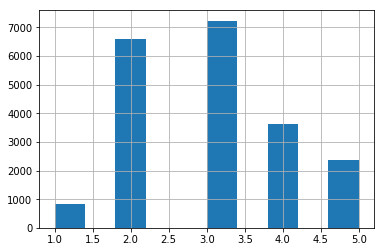

In [42]:
housing.income_cat.hist()

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

In [44]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [45]:
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [46]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [47]:
housing = strat_train_set.copy()

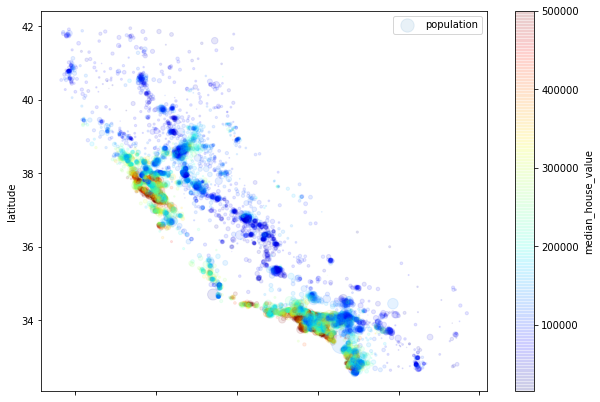

In [52]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.1, 
             s = housing["population"]/100, label="population", figsize=(10,7),
             c = "median_house_value", cmap=plt.get_cmap("jet"),colorbar=True
            )
plt.legend()

* Housing price related to location and population density

In [54]:
mat = housing.corr()

In [55]:
mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [56]:
mat["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

* Correlation coefficient only measures linear correlations (if x goes up then y goes up or down) It may completely miss non linear relationship.

In [58]:
housing["rooms_per_household"] = housing.total_rooms / housing.households

In [59]:
housing["bedrooms_per_room"] = housing.total_bedrooms / housing.total_rooms

In [60]:
housing["population_per_household"] = housing["population"] / housing["households"]

In [62]:
corr_mat = housing.corr()
corr_mat.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Prepare the Data
* Work on copies of data (keep original intact)
* Write functions for all transformation you apply
* Data cleaning
    - Fix or remove outlier
    - Fill missing value (with 0, mean, median) or drop their rows.
* Feature selection
    - Drop attributes that does not provide useful info for task
* Feature engineering
    - Discretize continuous features.
    - Decompose features (categorical, date/time)
    - Add promising transformation of features (log(x), sqrt(x), x^2)
    - Aggregate features into promising new features
* Feature scaling : Standardize or normalize features.

In [63]:
housing = strat_train_set.drop("median_house_value",axis=1)

In [64]:
housing_labels = strat_train_set["median_house_value"].copy()

#### Data cleaning
* Get rid of corresponding entry
```
housing.dropna(subset=["total_bedrooms"])
```

* Get rid of whole attributes
```
housing.drop("total_bedrooms", axis=1)
```

* Set the values to some value (0, mean, median)
```
median=housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=true)
```

* Imputer class used to impute missing values in our dataset. It belongs to transformer classes. transformer classes used for data transformation. 2 methods `fit` and `transform`.
* `fit` learn parameters from training data.
* `transform` use that parameter to tranform the data.
* Same number of features should be there in dataset which needs to transform as data array was used to fit the model.

In [1]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median") # Other parameter missing_values='NaN', axis = 0 or 1, 0 means mean of col, 1 means of row.

C:\Users\davep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


* For categorical column strategy can be `most_frequent`.

In [68]:
housing_num = housing.drop("ocean_proximity", axis = 1) # Only numerical columns

In [69]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

* imputer computed median of each attribute and stored the result in its `statistics_` instance variable.

In [70]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

* It is same as

In [71]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [72]:
X = imputer.transform(housing_num)

* Above, we used trained imputer by transforming training set by replacing missing values by learned medians.

![](images/transform.PNG)

In [73]:
housing_num = pd.DataFrame(X, columns=housing_num.columns)

#### Handling Test and Categorical attributes
* Convert text labels to numbers
* In pandas we can easily convert binary label via

```
users["sub_enc"] = users["sub"].apply(lambda val: 1 if val == "y" else 0)
```

* In sklearn

```
le = labelEncoder()
users["sub_enc"] = le.fit_transform(users["sub"])
```

* We can use `inverse_transform` to transform the integer class labels back into original string representation

```
le.inverse_tranform(users["sub_enc"])
```

```
size_mapping = {'XL':3, "L":2, "M":1}
df['size'] = df['size'].map(size_mapping)
```

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing.ocean_proximity
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [75]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

* Ml algo can trap in 2 near by values more similar to each other, which is not true here. If in LabelEncoder green's code is 2 and red's is 3. ML algo will think red is larger than green.
* One hot encoding create new dummy feature for each unique value in nominal feature column.
* So, to fix it create one binary attribute per category. Attribute is 1 if it is `<1H OCEAN` or else 0. It is called one-hot encoding.
* In pandas we can do this using `pd.get_dummies(users["fav_color"])`

```
ohe = OneHotEncoder(categorical_feature=[0]) 
# we defined the column position of the variable that we want to transform via the categorical_features
ohe.fit_transform(X).toarray()
```
* To omit `toaaray()` step we can pass `sparse=False` to return regular Numpy array.

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
encoder = OneHotEncoder()

In [78]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

C:\Users\davep\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [79]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

* It will return sparse matrix.

In [80]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

* `OneHotEncoder` can introduce multicollinearity, method which require matrix inversion can be problematic.
* If feature is highly correlated, matrices are difficult to invert, which leads to numerically unstable estimates
* Solution to reduce correlation is remove one feature. It will not loose information as with other feature we can guess removed information.
* In `get_dummies` we can pass `drop_first=True` to remove first encoded column.

#### LabelBinarizer
* Transform text label to one hot directly.

In [83]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer() # Passing `sparse_output=True` will yield sparse matrix instead of default numpy.

housing_cat_1hot = encoder.fit_transform(housing_cat)

In [84]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transformation
* Custom cleanup operation, combining specific attributes.
* Create class and implement `fit()`, `transform()`, `fit_transform()`
* `fit_transform()` can be get automatically by adding `TransformerMixin` as a base class.
* Adding `BaseEstimator` as a base class can get extra methods like `get_params()` and `set_params()` Useful to hyperparameter tuning.

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

In [89]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [93]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroms_per_room = True):
        self.add_bedroms_per_room = add_bedroms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedroms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [94]:
attr_adder = CombinedAttributesAdder(add_bedroms_per_room=False)

In [95]:
housing_extra_attrib = attr_adder.transform(housing.values)

### Feature Scaling
* Decision tree and random forest does not need feature scaling, as they are scale invariant.
* We have 2 features one ranging from 1 to 10, second from 1 to 100000. When we think square error function, algo busy optimizing the weights according to larger errors in the second features. KNN algo with Euclidean distance, compute distances between sample dominated by second feature axis.
*  ML algo does not perform well when features has different scales
1. Min-Max Scale (Normalization)
    - Rescaling feature to range of [0,1]
    - Values shifted and scaled so they end up in range of 0 and 1.
    - Subtract min value and divide by (max-min)
    - Useful when we need value in bounded interval
    - `MinMaxScaler` is transformer provided by sklearn. `feature_range` is used to change range if we do not want 0-1.

```
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
```

2. Standardization:
    - Subtract mean value (Standardize value always have 0 mean)
    - Divide by variance so resulting distribution has unit variance.
    - Does not bound features to specific range like min-max scale (neural network needs 0-1 scale)
    - less affected by outliers.
    - `StandardScaler`
    - Useful in optimization algo like gradient descent.
    - Many linear model like logistic regression and SVM, initialize weights to 0 or small random value close to 0.
    - Using standardization, we center feature column at mean 0 and standard deviation 1. So feature column has same parameters as standard normal distribution which makes easier to learn weights.
    - It maintains useful info about outlier and makes algo less sensitive to them.
    
```
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
```

* A's height is 5.9 and weight 175 lb, fits L size shirt
* B's height is 5.2 and weight 115 lb, fits S size shirt
* C's height is 6.1 and weight 140 lb Which size shirt C will fit in.
* A = 175 + 5.9 = 180.9
* B = 226 + 5.2 = 120.2
* C = 140 + 6.1 = 146.1, C is near to B so S will fit. But here weight feature dominate more so we end up having wrong answer.

* Standardization transform continuous numerical data to make normally distributed.
* Sklearn models assume normally distributed data otherwise introduce bias.
* Methods are log normalization and feature scaling.
* Linear model needs linear relationship among features. Some column has high variance(use log normalization), features with different scales.
* Log normalization
    - Captures relative changes, magnitude of changes, keeps everything in positive space.
    - `df["col"] = np.log(df["col"])`
* Scaling data:
    - Feature in different scales
    - Center feature around 0 and unit variance
    - Transform to approximately normal distribution
    - When variance in relatively low across the feature, scaling is good choice

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_tansform(df), columns=df.columns)
```

### Transformation Pipeline

* To execute transformation in right order, `Pipeline` class helps us.

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [127]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [128]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

* `Pipeline` constructor takes a list of name/estimator pairs defining a sequence of steps.

In [129]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y =None):
        return X[self.attribute_names].values # Convert to numpy array

In [141]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self):
        self.encoder = LabelBinarizer()
    def fit(self, x, y=None):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=None):
        return self.encoder.transform(x)

In [142]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [143]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [144]:
cat_pipeline = Pipeline([
    ('Selector', DataFrameSelector(cat_attribs)),
    ('label_bimarizer', MyLabelBinarizer())
])

In [145]:
from sklearn.pipeline import FeatureUnion # Combine pipeline

In [146]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [147]:
house_prepared = full_pipeline.fit_transform(housing)

## Short-List Promising model
* Train quick and dirty model from different category (linear, naive bayes, SVM, Random forest, neural nets) using standard parameter
* Measure and compare their performance
    - For each model use N-fold cross validation and compute the mean and Standard deviation of the performance on the N folds
* Analyze most significant variable for each algo
* Analyze type of error algo make.
* Short list top 3 to 5 most promising model, preferring model that makes different kind of errors.

* Estimators in sklearn has API similar to transformer class
* It has `fit`,  `predict` and `transform` method
![](images/estimator.PNG)

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lin_reg = LinearRegression()
lin_reg.fit(house_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [151]:
some_data = housing.iloc[:5]

In [152]:
some_label = housing_labels.iloc[:5]

In [153]:
some_data_prepared = full_pipeline.transform(some_data)

In [154]:
lin_reg.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [155]:
list(some_label)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [156]:
from sklearn.metrics import mean_squared_error

In [157]:
housing_prediction = lin_reg.predict(house_prepared)

In [158]:
lin_mse = mean_squared_error(housing_labels, housing_prediction)

In [159]:
lin_rmse = np.sqrt(lin_mse)

In [161]:
lin_rmse # prediction error

68628.19819848923

* Model is underfitting, feature is not providing great info or model is not powerful enough. We can feed model new feature or reduce the constraints of the model.

In [162]:
from sklearn.tree import DecisionTreeRegressor

In [163]:
tree_reg = DecisionTreeRegressor()

In [164]:
tree_reg.fit(house_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [165]:
housing_prediction = tree_reg.predict(house_prepared)

In [167]:
tree_mse = mean_squared_error(housing_labels, housing_prediction)

In [169]:
tree_rmse = np.sqrt(tree_mse)

In [170]:
tree_rmse

0.0

### Cross validation


* K-fold cross validation, randomly split training set into 10 distinct subset called folds. Then train and evaluate decision tree model 10 times. Pick a fold and train model on other 9 folds.

In [171]:
from sklearn.model_selection import cross_val_score

In [172]:
scores = cross_val_score(tree_reg, house_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [173]:
tree_rmse = np.sqrt(-scores)

In [174]:
tree_rmse

array([68941.93574944, 65884.38392245, 70601.20377153, 68617.48472403,
       71523.12925775, 74496.53388036, 71123.05879326, 70348.14686583,
       77323.21139945, 69566.79516307])

In [175]:
tree_rmse.mean()

70842.5883527169

In [176]:
tree_rmse.std()

3016.1123552689633

In [177]:
lin_scores = cross_val_score(lin_reg, house_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)

* When model is overfitting, simplify it. Constrain it(Regularize it)

* We can save sklearn model using python's `pickle` module or `sklearn.externals.joblib`

In [178]:
from sklearn.externals import joblib

In [181]:
joblib.dump(lin_reg, "lin_reg.pkl")

['lin_reg.pkl']

In [182]:
model = joblib.load("lin_reg.pkl")

## Fine tune model
* Fine tune hyperparameter using cross validation
* Treat data transformation choice as hyper parameter (replace missing with 0 vs median val vs drop rows)
* Unless there are very hyperparameter values to explore, prefer random search over grid
* Try ensemble methods, combining best models will often perform better than running individually
* Once you confident about your final model, measure its performance on the test to estimate generalization error.

### Grid Search
* Searching for suitable hyperparameter is tedious.
* `GridSearchCV` automatically search for us. We tell which hyperparameter and what value to try.

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [187]:
grid_search.fit(house_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [188]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [189]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

* `param_grid` tells sklearn to evaluate 3 x 4 = 12 combination of n_estimators and max_features hyperparameter and then try all 2 x 3 = 6 combination of second dict.
* Grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values. And train each for 5 times. 18 * 5 = 90 rounds of training.

In [190]:
cvres = grid_search.cv_results_

In [191]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64174.7769928622 {'max_features': 2, 'n_estimators': 3}
55591.604732853884 {'max_features': 2, 'n_estimators': 10}
53304.68235466128 {'max_features': 2, 'n_estimators': 30}
59135.33233933511 {'max_features': 4, 'n_estimators': 3}
53079.8088911383 {'max_features': 4, 'n_estimators': 10}
50640.90929016511 {'max_features': 4, 'n_estimators': 30}
59428.788814006264 {'max_features': 6, 'n_estimators': 3}
52308.93136040404 {'max_features': 6, 'n_estimators': 10}
49946.488728155055 {'max_features': 6, 'n_estimators': 30}
59461.72147140429 {'max_features': 8, 'n_estimators': 3}
52269.16914094347 {'max_features': 8, 'n_estimators': 10}
50013.75203637609 {'max_features': 8, 'n_estimators': 30}
61406.21489654406 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54703.61877242609 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60136.31952256206 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52881.535506261 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

* For utility function greater is better, for cost function lower is better.
* We also can treat some data preparation step as a hyper parameter, Ex. Add or not feature which we are not sure , Find best way to treat outlier, missing feature and feature selection.

### Randomized Search
* Grid search is fine to explore few combination. When search space is large it is preferable to use `RandomizedSearchCV`. * Instead trying all possible combination, evaluates random combination by selecting random value for each hyperparameter at every iteration.
* Setting 1000 iteration will explore 1000 different values for each hyperparameter.

### Ensemble Methods
* combination of models. Ex random forest vs decision tree.

### Analyze best models and errors
* Let's check which feature is important in accurate prediction

In [192]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [193]:
feature_importance

array([7.47325533e-02, 6.89106884e-02, 4.56267848e-02, 1.77690283e-02,
       1.66216588e-02, 1.76508071e-02, 1.68059041e-02, 3.41612209e-01,
       4.88302085e-02, 1.07743454e-01, 8.09856404e-02, 1.65325423e-02,
       1.32132932e-01, 3.62873532e-05, 5.21129843e-03, 8.79800338e-03])

* By doing this we can drop less useful feature.

### Evaluate model on Test set

In [194]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set.median_house_value.copy()

In [195]:
X_test_prepared = full_pipeline.transform(X_test) # Make sure we are testing so transform not fit_transform

In [196]:
final_prediction = final_model.predict(X_test_prepared)

In [197]:
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [198]:
final_rmse

48191.92295447505

## Present Solution
* Document what you learn
* Presentation
* Explain why solution achieve business objective
* Describe what worked, what not
* List assumption and system limitation


## Launch
* Write unit test.
* Write monitoring code which check live performance and trigger alerts when performance drops
* Monitor input quality
* Retrain on regular basis on fresh data.

### Business Cycle
* Understand business problem, current solution, What is ROI
* Analyze, which buckets the problem falls, What error metrics make sense, what stories must be told
* Data : Define target for supervised. derive relevant attributes. Pre process and visualize.
* Engineer features (Transform data, PCA it, Create smaller number of classes for categorical)
* Keep experimenting with various hyper parameters, regularize it
* Try at least 3 model on 3 types of data sets with 3 sets of hyper parameters before making final choice.
* Design validation strategy.
* Divide the data into train, test and CV.
* Plot the error metric for all data for all model and pick best one.

### Technical issues
* Supervised vs unsupervised problem
* Overfitting: Too much specialization on training data
    - Use simple models.
    - Use train validate test
* Understanding data and acquiring clean data is key
* Various data transformation like normalization, discretization.
* Handle missing values
    - Go with domain expert to learn more about missing values.
    - Cylinder, sphere, axis for each eye. Generally cylinder is 0. Sphere is -3, -3.5. 
    - Cylinder was empty, if I use imputers I can get wrong values, because missing cylinder means 0.
* If the data is imbalanced, oversample minority or under sample the majority class.
    - 99% data has no cancer, 1% data is with cancer.
    - Most classifier is not able to handle such imbalance data.
    - If minority has 10 instance only, just repeat it take 1st instance for 15 times.
* If certain mis classification errors are important than others, cost sensitive learning should be done.
    - Some time false negative or false positive is worst. For cancer false negative is bad.
    - Assign wight associated to each such cost type.
* Lack of enough data
    - Train model with 25% data, then 50 then 100%. If improvement is shown ask for more data.
* Selecting good features is useful, instead using all
    - We have data of lesik surgery, and we try to predict sphere number after the surgery. Ideally we need a 0 sphere.
    - There is a one attribute, complication. We can not use it to train model as we never know that in surgery complication will occur or not.

### Non technical issues
* Interpreting data and ensuring data quality
    - Different place has different format of data storage and schema, we have to resolve it
* Data privacy
    - Healthcare, banking
    - We do not need email, name, From phone number just keep first 3 digit
* Safe data sharing
    - Do not send data via email
    - Request client to upload data to their cloud account
* Delays and formatting issues
* Domain understanding
* Deployment
* User acceptance
* Charging customers
* Data size